# Capstone Project 1 - Data Story

### Questions to answer:
Q1 - Are there some keywords that can discriminate the different types of questions? What are they?

Q2 - How Five Ws and How would help with the classification?

In [2]:
%matplotlib inline

In [3]:
import codecs
import re

from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd

import spacy

In [4]:
# download spacy dictionary 
nlp = spacy.load('en_core_web_lg')

In [6]:
# read dataset file into a list of lines
file_name = "train_5500.label"
with open(file_name, 'rb') as f:
    txt = f.read()
lines = txt.decode('latin').splitlines()

# build a dataframe with columns: 'label', 'sublabel','question'
df = []
for idx, line in enumerate(lines):
    match = re.match('([A-Z]+)\:([a-z]+)[ ]+(.+)',line)
    df.append(match.groups())
df = pd.DataFrame(df, columns = ['label', 'sublabel','question'])
df.head()

,label,sublabel,question
0,DESC,manner,How did serfdom develop in and then leave Russ...
1,ENTY,cremat,What films featured the character Popeye Doyle ?
2,DESC,manner,How can I find a list of celebrities ' real na...
3,ENTY,animal,What fowl grabs the spotlight after the Chines...
4,ABBR,exp,What is the full form of .com ?


In [10]:
# build a dataframe of word counts with question labels as columns and indexed by the words
labels = ['HUM', 'DESC', 'ENTY', 'LOC', 'ABBR', 'NUM']
word_count= dict.fromkeys(labels)
for label in labels:
    word_count_labeled = Counter()
    for idx, row in df[df['label'] == label].iterrows():
        doc = nlp(row['question'])
        word_count_labeled += Counter([t.text for t in doc 
                                      if t.pos_ in 
                                      ['NOUN', 'PROPN', 'ADJ', 'ADV', 'PRON']])
        word_count[label] = dict(word_count_labeled)
df_word_count = pd.DataFrame(word_count)
df_word_count.tail()

,HUM,DESC,ENTY,LOC,ABBR,NUM
zone,NaN,NaN,NaN,NaN,NaN,1.0
zones,NaN,NaN,NaN,1.0,NaN,1.0
zoo,NaN,NaN,NaN,1.0,NaN,NaN
zoological,NaN,1.0,NaN,NaN,NaN,NaN
zoonose,NaN,NaN,1.0,NaN,NaN,NaN


In [31]:
# build a dataframe with the most common words for each label
df_word_top_five = pd.DataFrame()
for col in df_word_count.columns:
    df_word_top_five = pd.concat([df_word_top_five, df_word_count[col].
                               sort_values(ascending=False).head(5)/
                               df_word_count[col].sum()*100], axis=1, sort=False)
df_word_top_five.head()

,HUM,DESC,ENTY,LOC,ABBR,NUM
Who,8.605296,NaN,NaN,NaN,NaN,NaN
What,4.633621,15.472901,12.449799,7.622183,28.421053,3.727506
name,1.462438,NaN,1.372155,NaN,NaN,NaN
first,1.246921,NaN,0.836680,NaN,NaN,NaN
company,0.646552,NaN,NaN,NaN,NaN,NaN


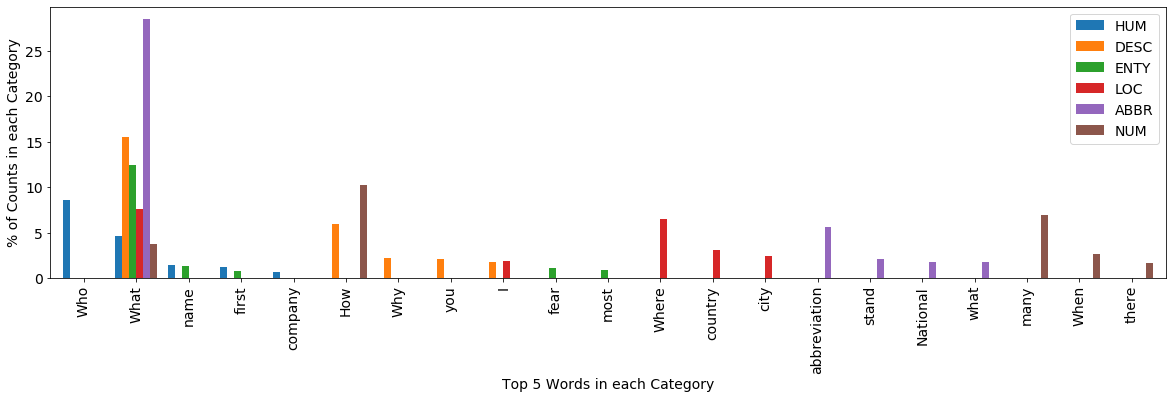

In [32]:
# plot the top 5 common words for each label as the % of total counts/label
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams.update({'font.size': 14})
df_word_top_five.plot.bar(width=0.8)
plt.xlabel('Top 5 Words in each Category')
plt.ylabel('% of Counts in each Category')
plt.xticks()
plt.show()

### Answers
A1 - The chart above shows the top 5 common words in each category. Some keywords seem to have some discrimination power:

- Who (HUM), Where (LOC), many (NUM), abbreviation (ABBR)

Note: ENTY and DESC seem to not have a powerful discriminating single keyword -> likely low classification accuracy

A2 - "Who" and "Where" have the most discriminating power, then "When", "Why", and "How". "What" dose not seem to be a key W word.